In [21]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
#%%capture
#!wget https://www.dropbox.com/s/im0jixa27aav1do/train.zip
#!wget https://www.dropbox.com/s/lot1946ol8q8u85/test.zip

In [23]:
#zip = ZipFile('train.zip')
#zip.extractall()

#zip = ZipFile('test.zip')
#zip.extractall()

In [24]:
train_path = 'train'
test_path = 'test'

height = 112
width = 112
channels = 3

In [25]:
X_train = []
Y_train = []
X_test_pred = []
Y_test_pred = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

9285

In [26]:
images = os.listdir(train_path)
for a in images:
    image = Image.open(train_path + '/' + a)
    image = image.resize((height,width))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(a.split(' (')[0].lower())

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [27]:
set_labels = set(Y_train)
labels = {}
idx = 0
for i in set_labels:
    idx += 1
    labels[i] = idx


In [28]:
Y_train = [labels[i] for i in Y_train]

In [29]:
images = os.listdir(test_path)
for a in images:
    image = Image.open(test_path + '/' + a)
    image = image.resize((height,width))
    image = np.array(image)
    X_test_pred.append(image)
    Y_test_pred.append(a.split(' (')[0].lower())

X_test_pred = np.array(X_test_pred)
Y_test_pred = np.array(Y_test_pred)

In [30]:
Y_test_pred = [labels['green called cattleheart'] if i == 'green celled cattleheart' else labels[i] for i in Y_test_pred]

In [31]:
X_train = np.array(X_train) / 255
X_test_pred = np.array(X_test_pred) / 255
Y_train = np.array(Y_train)
Y_test_pred = np.array(Y_test_pred)

In [32]:
Y_train=keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
#Y_test_pred= keras.utils.to_categorical(Y_test_pred,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test_pred.shape)

(9285, 9285)
(750,)


In [33]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 110, 110, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 128)       147584    
                                                      

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42, shuffle=True)

In [37]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test) )

Epoch 1/15
233/233 [==============================] - 284s 1s/step - loss: 4.5328 - accuracy: 0.0233 - val_loss: 3.9216 - val_accuracy: 0.0641
Epoch 2/15
233/233 [==============================] - 296s 1s/step - loss: 3.5060 - accuracy: 0.1229 - val_loss: 2.8509 - val_accuracy: 0.2499
Epoch 3/15
233/233 [==============================] - 295s 1s/step - loss: 2.8206 - accuracy: 0.2513 - val_loss: 2.1760 - val_accuracy: 0.4173
Epoch 4/15
233/233 [==============================] - 298s 1s/step - loss: 2.3566 - accuracy: 0.3562 - val_loss: 1.7850 - val_accuracy: 0.5024
Epoch 5/15
233/233 [==============================] - 302s 1s/step - loss: 2.0222 - accuracy: 0.4408 - val_loss: 1.8936 - val_accuracy: 0.4954
Epoch 6/15
233/233 [==============================] - 302s 1s/step - loss: 1.7618 - accuracy: 0.5039 - val_loss: 1.5269 - val_accuracy: 0.5870
Epoch 7/15
233/233 [==============================] - 304s 1s/step - loss: 1.5634 - accuracy: 0.5513 - val_loss: 1.2541 - val_accuracy: 0.6500

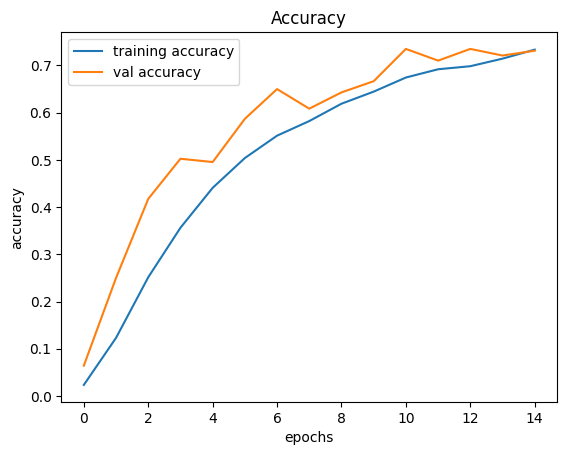

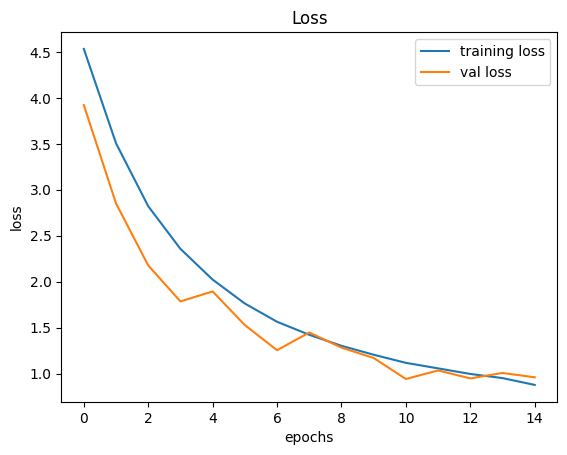

In [38]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
pred = model.predict(X_test_pred)
predicted_classes = np.argmax(pred, axis=1)

24/24 [==============================] - 8s 318ms/step


In [40]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(Y_test_pred, predicted_classes)*100)

Test Data accuracy:  78.93333333333334
